In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np
import xarray as xr
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.colors import SymLogNorm
import matplotlib.patheffects as pe
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 10,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

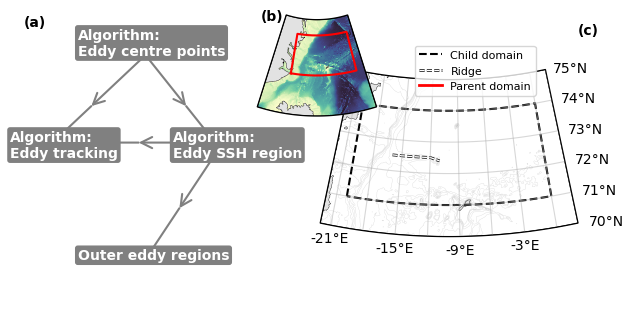

In [54]:
fig = plt.figure(
    figsize=(6.2217,3), layout = 'constrained'
)

ax = fig.add_subplot(1,2,1)

# Fjern x-ticks
ax.set_xticks([])

# Fjern y-ticks
ax.set_yticks([])


text_location = [0.25,0.85]
text_location_arr = [0.5,0.85]
arrow_location = [0.8,0.5]
arrow_location2 = [0.1,0.5]

ax.annotate(f'Algorithm:\nEddy centre points', 
    xy=text_location, 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

midpoint = [(text_location_arr[0] + arrow_location2[0]) / 2, (text_location_arr[1] + arrow_location2[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location2,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Legg til pilene på aksen
ax.add_patch(arrow1)
ax.add_patch(arrow2)

midpoint = [(text_location_arr[0] + arrow_location[0]) / 2, (text_location_arr[1] + arrow_location[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Legg til pilene på aksen
ax.add_patch(arrow1)
ax.add_patch(arrow2)

ax.annotate(f'Algorithm:\nEddy SSH region', 
    xy=[arrow_location[0]-0.2,arrow_location[1]], 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

ax.annotate(f'Algorithm:\nEddy tracking', 
    xy=[arrow_location2[0]-0.1,arrow_location2[1]], 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

text_location = [arrow_location[0],arrow_location[1]+0.05]
text_location_arr = [arrow_location[0],arrow_location[1]+0.05]
arrow_location = arrow_location2[0]+0.05,arrow_location2[1]+0.05


midpoint = [(text_location_arr[0] + arrow_location[0]) / 2, (text_location_arr[1] + arrow_location[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

ax.add_patch(arrow1)
ax.add_patch(arrow2)

text_location = [0.25,0.15]

ax.annotate(f'Outer eddy regions', 
    xy=text_location, 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

text_location = [0.75,0.5]
text_location_arr = [0.75,0.5]
arrow_location = [0.5,0.15]


midpoint = [(text_location_arr[0] + arrow_location[0]) / 2, (text_location_arr[1] + arrow_location[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

ax.add_patch(arrow1)
ax.add_patch(arrow2)

# Remove the spines (borders) for ax
for spine in ax.spines.values():
    spine.set_visible(False)

# Map
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(70,75),X=slice(-22,0))
depth_no_nan = depth

depth = depth.where(depth > 0, np.nan)

from matplotlib.path import Path

ax2 = fig.add_subplot(1,2,2,projection=ccrs.NorthPolarStereo(central_longitude=-10))

extent = [-22+10,2+10,70,75]

# mesh = ax.pcolormesh(eddyDensity_AC.X,eddyDensity_AC.Y,eddyDensity_AC,cmap=cmo.matter,vmax=1,transform=ccrs.PlateCarree())
# cbar = fig.colorbar(mesh, ax=ax, shrink=0.7,pad=0.01)
# cbar.set_label('Eddy density')

land = depth_no_nan.where(depth_no_nan==0)

ax2.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-20, -20, 0, 0, -20]
lat_coords = [71, 74, 74, 71, 71]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-10)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
ax2.plot(x_coords, y_coords, color='k', linestyle='--', transform=ax2.transData,label='Child domain', zorder=2)

lon = depth['XC']
lat = depth['YC']
# Add land contour
ax2.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0, transform=ccrs.PlateCarree())
ax2.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.3, transform=ccrs.PlateCarree())

ax2.plot([-16,-15,-14,-13,-12,-11],[72.5,72.5,72.5,72.5,72.5,72.4],linestyle='--',color='white',label='Ridge',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax2.transData, edgecolor='black', facecolor='none')
ax2.add_patch(patch)

# Set the boundary using the transformed path
ax2.set_boundary(patch.get_path(), transform=ax2.transData)

# Add gridlines without labels
gl = ax2.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-9, extent[1]-10 + 1, 6)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 1)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax2.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax2.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')

# Collect existing handles and labels
handles, labels = ax2.get_legend_handles_labels()

# Manually add a custom label
handles.append(plt.Line2D([0], [0], color='red', lw=2))  # Example custom handle
labels.append("Parent domain")

ax2.legend(handles,labels,loc=(0.35,0.85))

# Overview map
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(65,77),X=slice(-30,5))
depth_notZero = depth
depth = depth.where(depth > 0, np.nan)

inset_ax = fig.add_axes([0.4, 0.6, 0.2, 0.4], projection=ccrs.NorthPolarStereo(central_longitude=-12.5))
inset_ax.pcolormesh(depth.X, depth.Y, depth, cmap=cmo.deep, transform=ccrs.PlateCarree())
inset_ax.contour(depth_notZero.X,depth_notZero.Y,depth_notZero,[0],colors='black', linewidths=0.25, transform=ccrs.PlateCarree())
land = depth_notZero.where(depth_notZero==0)

inset_ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-22, -22, 2, 2, -22]
lat_coords = [70, 75, 75, 70, 70]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-12.5)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
inset_ax.plot(x_coords, y_coords, color='r', linestyle='-', transform=inset_ax.transData,label='Parent domain', zorder=2)

inset_ax.set_extent([-30, 5, 64, 77], crs=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
extent = [-30+12.5, 5+12.5, 65, 77]
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=inset_ax.transData, edgecolor='black', facecolor='none')
inset_ax.add_patch(patch)

# Set the boundary using the transformed path
inset_ax.set_boundary(patch.get_path(), transform=inset_ax.transData)

ax.annotate('(a)', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, weight='bold', color='black')
inset_ax.annotate('(b)', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, weight='bold', color='black')
ax2.annotate('(c)', xy=(0.95, 1.2), xycoords='axes fraction', fontsize=10, weight='bold', color='black')

# Save the figure
fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyAlgoStructure',dpi=300, facecolor='none', edgecolor='none',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

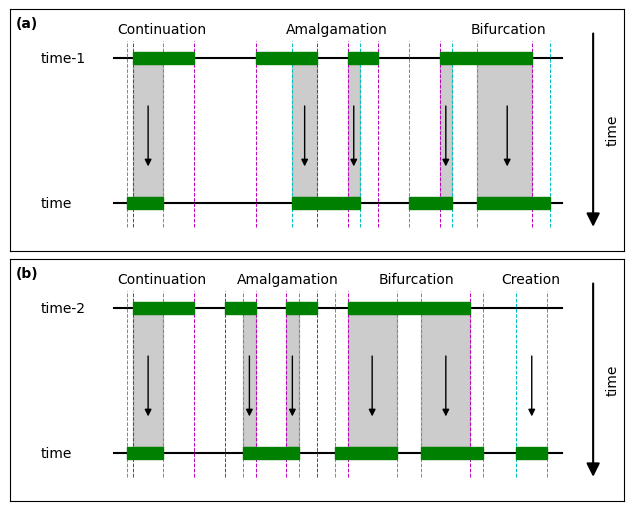

In [3]:
fig, (ax,ax2) = plt.subplots(2,1,sharex=True,sharey=True,
    figsize=(6.2217,5),layout = 'constrained',facecolor='none', edgecolor='none'
)

# Fjern x-ticks
ax.set_xticks([])

# Fjern y-ticks
ax.set_yticks([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.annotate('(a)',[0.01,0.925],fontweight='bold')
ax2.annotate('(b)',[0.01,0.925],fontweight='bold')

# Horizontal lines
ax.plot([0.17,0.9],[0.8,0.8], color='k',zorder=0)
ax.plot([0.17,0.9],[0.2,0.2], color='k',zorder=0)
#Vertical
arrow = FancyArrowPatch(
    posA=[0.95,0.9],
    posB=[0.95,0.1],
    arrowstyle='-|>',
    mutation_scale=20,
    color='k',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)
ax.annotate('time',[0.97,0.45],rotation=90)


ax.annotate('time',[0.05,0.18],rotation=0)
ax.annotate('time-1',[0.05,0.78],rotation=0)

ax.annotate('Continuation',[0.175,0.9])
ax.annotate('Amalgamation',[0.45,0.9])
ax.annotate('Bifurcation',[0.75,0.9])

# add eddy SSH area Continuation
ax.fill([0.2,0.3,0.3,0.2],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.2,0.2],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.3,0.3],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.2,0.25,0.25,0.2],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.19,0.25,0.25,0.19],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.19,0.19],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.25,0.25],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.225,0.6],
    posB=[0.225,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)


# add eddy SSH area Amalgamation
ax.fill([0.4,0.5,0.5,0.4],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.4,0.4],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.5,0.5],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.46,0.5,0.5,0.46],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.55,0.6,0.6,0.55],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.55,0.55],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.6,0.6],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.55,0.57,0.57,0.55],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.46,0.57,0.57,0.46],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.46,0.46],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.57,0.57],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.48,0.6],
    posB=[0.48,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.56,0.6],
    posB=[0.56,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)

# add eddy SSH area Bifurcation
ax.fill([0.7,0.85,0.85,0.7],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.7,0.7],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.85,0.85],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.7,0.72,0.72,0.7],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.65,0.72,0.72,0.65],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.65,0.65],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.72,0.72],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.76,0.85,0.85,0.76],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.76,0.88,0.88,0.76],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.76,0.76],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.88,0.88],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.81,0.6],
    posB=[0.81,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.71,0.6],
    posB=[0.71,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)

# ax2
# Horizontal lines
ax2.plot([0.17,0.9],[0.8,0.8], color='k',zorder=0)
ax2.plot([0.17,0.9],[0.2,0.2], color='k',zorder=0)
#Vertical
arrow = FancyArrowPatch(
    posA=[0.95,0.9],
    posB=[0.95,0.1],
    arrowstyle='-|>',
    mutation_scale=20,
    color='k',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)
ax2.annotate('time',[0.97,0.45],rotation=90)
#ax.plot([0.95,0.95],[0.1,0.9], color='k')

ax2.annotate('time',[0.05,0.18],rotation=0)
ax2.annotate('time-2',[0.05,0.78],rotation=0)

ax2.annotate('Continuation',[0.175,0.9])
ax2.annotate('Amalgamation',[0.37,0.9])
ax2.annotate('Bifurcation',[0.6,0.9])
ax2.annotate('Creation',[0.8,0.9])

# add eddy SSH area Continuation
ax2.fill([0.2,0.3,0.3,0.2],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.2,0.2],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.3,0.3],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.2,0.25,0.25,0.2],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.19,0.25,0.25,0.19],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.19,0.19],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.25,0.25],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.225,0.6],
    posB=[0.225,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)


# add eddy SSH area Amalgamation
ax2.fill([0.35,0.4,0.4,0.35],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.35,0.35],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.4,0.4],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.38,0.4,0.4,0.38],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.45,0.5,0.5,0.45],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.45,0.45],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.5,0.5],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.45,0.47,0.47,0.45],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.38,0.47,0.47,0.38],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.38,0.38],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.47,0.47],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.39,0.6],
    posB=[0.39,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.46,0.6],
    posB=[0.46,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)

# add eddy SSH area Bifurcation
ax2.fill([0.55,0.75,0.75,0.55],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.55,0.55],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.75,0.75],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.55,0.63,0.63,0.55],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.53,0.63,0.63,0.53],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.53,0.53],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.63,0.63],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.67,0.75,0.75,0.67],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.67,0.77,0.77,0.67],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.67,0.67],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.77,0.77],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.59,0.6],
    posB=[0.59,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.71,0.6],
    posB=[0.71,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)

# add eddy creation
ax2.fill([0.825,0.875,0.875,0.825],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.825,0.825],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.875,0.875],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.85,0.6],
    posB=[0.85,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyTrackingAlgo',dpi=300, facecolor='none', edgecolor='none',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)